Loading preprocessed balanced dataset...
Splitting the dataset into training and testing sets...
Training the Naive Bayes model...
Training the MLP model...
Creating the voting ensemble...
Training the ensemble model...
Making predictions with the ensemble model...
Evaluating the ensemble model...
Accuracy: 99.11%
Precision: 99.11%
Recall: 99.11%
F1 Score: 99.11%
Plotting confusion matrix...


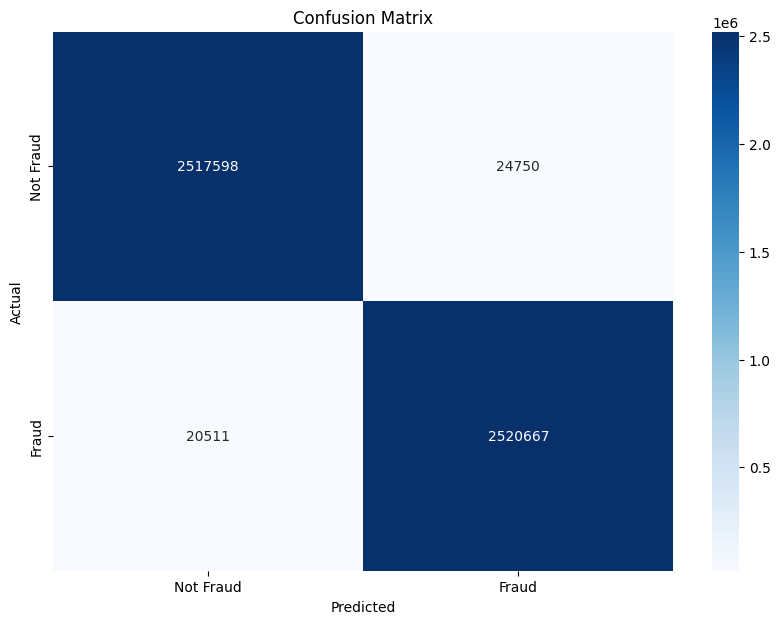

Saving the ensemble model to a file...
Ensemble model saved successfully.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

# Load preprocessed balanced dataset
print("Loading preprocessed balanced dataset...")
preprocessed_df = pd.read_csv('/content/drive/MyDrive/preprocessed_data_balanced.csv')  # Update the file path accordingly

# Features and target variable
X = preprocessed_df.drop(columns=['isFraud'])
y = preprocessed_df['isFraud']

# Split the dataset into training and testing sets
print("Splitting the dataset into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=75)

# Train a Naive Bayes model
print("Training the Naive Bayes model...")
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train, y_train)

# Train a new MLP model
print("Training the MLP model...")
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, solver='adam', random_state=42)
mlp_classifier.fit(X_train, y_train)

# Create a voting ensemble
print("Creating the voting ensemble...")
ensemble = VotingClassifier(estimators=[
    ('naive_bayes', naive_bayes),
    ('mlp_classifier', mlp_classifier)
], voting='soft')  # Use 'hard' for majority voting, 'soft' for weighted probabilities

# Train the ensemble model
print("Training the ensemble model...")
ensemble.fit(X_train, y_train)

# Make predictions with the ensemble model
print("Making predictions with the ensemble model...")
y_pred_ensemble = ensemble.predict(X_test)

# Evaluate the ensemble model
print("Evaluating the ensemble model...")
accuracy = accuracy_score(y_test, y_pred_ensemble)
precision = precision_score(y_test, y_pred_ensemble, average='weighted')
recall = recall_score(y_test, y_pred_ensemble, average='weighted')
f1 = f1_score(y_test, y_pred_ensemble, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred_ensemble)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')

# Plot confusion matrix
print("Plotting confusion matrix...")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Save the ensemble model to a file
print("Saving the ensemble model to a file...")
with open('/content/drive/MyDrive/ensemble_model_Numeric.pkl', 'wb') as f:
    pickle.dump(ensemble, f)

print("Ensemble model saved successfully.")